# Tesla Stock Price Prediction Using Multiple Linear Regression

## Import Packages

In [543]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

## Import Dataset

In [544]:
dataset = pd.read_csv('TSLA.csv')

In [545]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-24,360.130005,377.589996,354.000000,372.000000,372.000000,67680600
1,2021-11-26,366.489990,369.593323,360.333344,360.640015,360.640015,35042700
2,2021-11-29,366.996674,380.890015,366.730011,378.996674,378.996674,58393500
3,2021-11-30,381.456665,389.333344,372.666656,381.586670,381.586670,81276000
4,2021-12-01,386.899994,390.946655,363.586670,365.000000,365.000000,68450400
...,...,...,...,...,...,...,...
247,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64336000
248,2022-11-18,185.050003,185.190002,176.550003,180.190002,180.190002,75904900
249,2022-11-21,175.850006,176.770004,167.539993,167.869995,167.869995,92882700
250,2022-11-22,168.630005,170.919998,166.190002,169.910004,169.910004,78452300


In [546]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-24,360.130005,377.589996,354.000000,372.000000,372.000000,67680600
1,2021-11-26,366.489990,369.593323,360.333344,360.640015,360.640015,35042700
2,2021-11-29,366.996674,380.890015,366.730011,378.996674,378.996674,58393500
3,2021-11-30,381.456665,389.333344,372.666656,381.586670,381.586670,81276000
4,2021-12-01,386.899994,390.946655,363.586670,365.000000,365.000000,68450400


In [547]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,282.854153,289.679762,274.778505,281.935542,281.935542,8.060468e+07
std,50.844247,51.421762,49.623261,50.469315,50.469315,2.158657e+07
min,168.630005,170.919998,166.190002,167.869995,167.869995,3.504270e+07
25%,239.860001,246.792496,233.556668,238.743339,238.743339,6.568088e+07
50%,287.529999,293.940002,279.151673,287.238327,287.238327,7.857645e+07
75%,312.054161,320.699165,305.144997,312.297493,312.297493,9.303030e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,1.515657e+08


In [548]:
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [549]:
dataset.shape

(252, 7)

In [550]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


### Convert date object to date type

In [551]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [552]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-24,360.130005,377.589996,354.000000,372.000000,372.000000,67680600
1,2021-11-26,366.489990,369.593323,360.333344,360.640015,360.640015,35042700
2,2021-11-29,366.996674,380.890015,366.730011,378.996674,378.996674,58393500
3,2021-11-30,381.456665,389.333344,372.666656,381.586670,381.586670,81276000
4,2021-12-01,386.899994,390.946655,363.586670,365.000000,365.000000,68450400
...,...,...,...,...,...,...,...
247,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64336000
248,2022-11-18,185.050003,185.190002,176.550003,180.190002,180.190002,75904900
249,2022-11-21,175.850006,176.770004,167.539993,167.869995,167.869995,92882700
250,2022-11-22,168.630005,170.919998,166.190002,169.910004,169.910004,78452300


## Plot the dataset

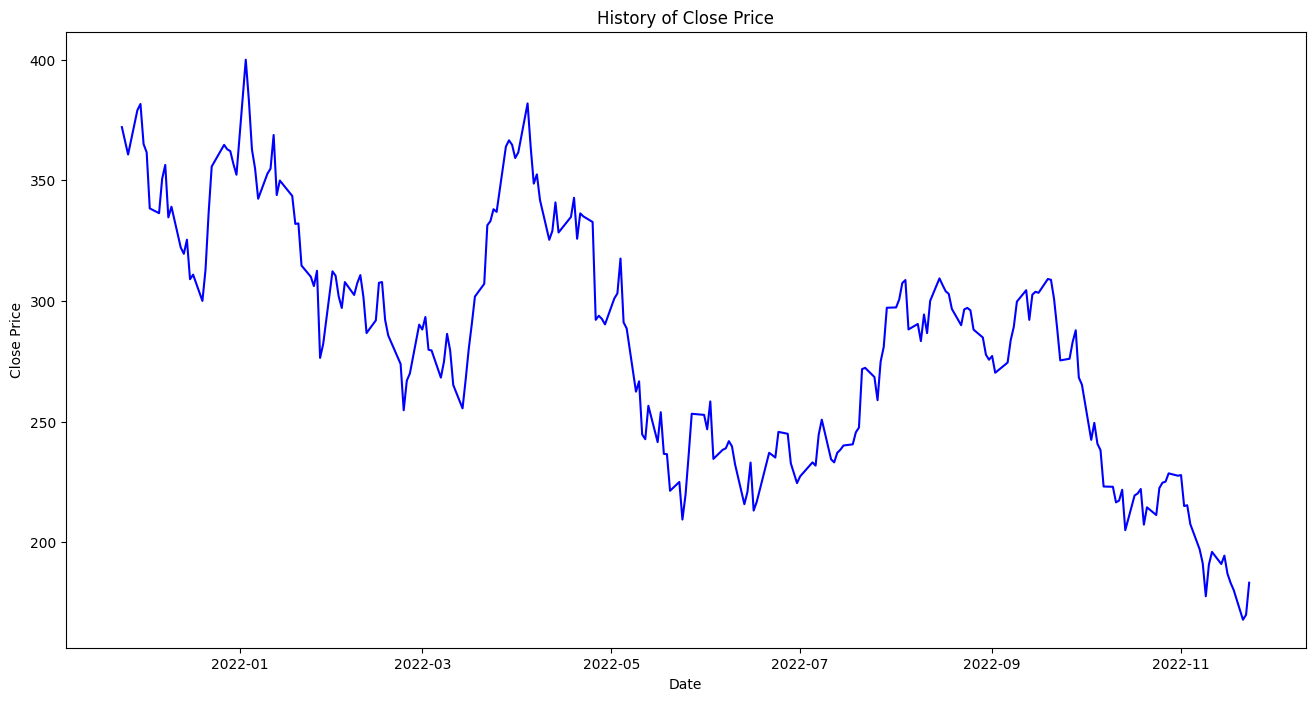

In [553]:
plt.figure(figsize=(16, 8))
plt.title("History of Close Price")
plt.plot(dataset['Date'], dataset['Close'], color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [554]:
fig = px.line(dataset, x="Date", y="Close", title="History of Close Price") 
fig.update_layout(
    autosize=False,
    width=1400,
    height=800,)
fig.show(config={'displayModeBar': False})    


In [555]:
dataset.columns.to_list()

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

## Splitting dataset into dependent and independent data

In [556]:
# X = dataset.loc[: , ~dataset.columns.isin(['Date', 'Close', 'Adj Close'])].values
# X

In [557]:
# y = dataset.loc[:, dataset.columns == 'Close'].values
# y

## Splitting data into training set and test set

In [558]:
X_train = dataset[0:201]
y_train = X_train['Close'].values
X_test = dataset[201:]
y_test = X_test['Close'].values
X_train = X_train.loc[:, ~dataset.columns.isin(['Close', 'Adj Close', 'Date'])]
X_train = X_train.values
X_test = X_test.loc[:, ~dataset.columns.isin(['Close', 'Adj Close', 'Date'])]
X_test = X_test.values

## Trainning model upon train data

In [559]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [560]:
y_train

array([372.      , 360.640015, 378.996674, 381.58667 , 365.      ,
       361.533325, 338.323334, 336.33667 , 350.583344, 356.320007,
       334.600006, 339.01001 , 322.136658, 319.503326, 325.329987,
       308.973328, 310.856659, 299.980011, 312.843323, 336.290009,
       355.666656, 364.646667, 362.823334, 362.063324, 356.779999,
       352.26001 , 399.926666, 383.196655, 362.706665, 354.899994,
       342.320007, 352.706665, 354.799988, 368.73999 , 343.853333,
       349.869995, 343.503326, 331.883331, 332.089996, 314.633331,
       310.      , 306.133331, 312.470001, 276.366669, 282.116669,
       312.23999 , 310.416656, 301.886658, 297.046661, 307.773346,
       302.446655, 307.333344, 310.666656, 301.516663, 286.666656,
       291.920013, 307.476654, 307.796661, 292.116669, 285.660004,
       273.843323, 254.679993, 266.92334 , 269.956665, 290.143341,
       288.123322, 293.296661, 279.763336, 279.429993, 268.193329,
       274.799988, 286.323334, 279.433319, 265.116669, 255.456

In [561]:
pred = regressor.predict(X_test)
pred

array([303.52313804, 307.41577301, 300.36974127, 306.50143048,
       311.55886987, 306.53685037, 289.26448449, 275.80466478,
       280.93643412, 282.77681132, 283.51945011, 269.21722933,
       271.20757466, 244.24051425, 249.89541644, 236.97700455,
       240.80900119, 224.90730612, 222.32998022, 220.51209789,
       216.0231789 , 219.38056512, 209.28159211, 220.02488317,
       219.82425673, 221.43624208, 210.07070315, 211.70371732,
       206.85028945, 222.67804484, 228.40600848, 227.63650498,
       221.00104544, 226.16176607, 231.51280927, 218.31724013,
       218.90094467, 207.39870199, 199.43051514, 190.27598214,
       184.3796987 , 183.81407898, 192.9304699 , 190.69707729,
       197.70244291, 188.11139246, 183.95423443, 178.67746376,
       170.50972061, 169.46889763, 182.18542857])

In [562]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9937695552094155

In [563]:
print(np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[303.52313804 302.609985  ]
 [307.41577301 303.75      ]
 [300.36974127 303.350006  ]
 [306.50143048 309.070007  ]
 [311.55886987 308.730011  ]
 [306.53685037 300.799988  ]
 [289.26448449 288.589996  ]
 [275.80466478 275.329987  ]
 [280.93643412 276.01001   ]
 [282.77681132 282.940002  ]
 [283.51945011 287.809998  ]
 [269.21722933 268.209991  ]
 [271.20757466 265.25      ]
 [244.24051425 242.399994  ]
 [249.89541644 249.440002  ]
 [236.97700455 240.809998  ]
 [240.80900119 238.130005  ]
 [224.90730612 223.070007  ]
 [222.32998022 222.960007  ]
 [220.51209789 216.5       ]
 [216.0231789  217.240005  ]
 [219.38056512 221.720001  ]
 [209.28159211 204.990005  ]
 [220.02488317 219.350006  ]
 [219.82425673 220.190002  ]
 [221.43624208 222.039993  ]
 [210.07070315 207.279999  ]
 [211.70371732 214.440002  ]
 [206.85028945 211.25      ]
 [222.67804484 222.419998  ]
 [228.40600848 224.639999  ]
 [227.63650498 225.089996  ]
 [221.00104544 228.520004  ]
 [226.16176607 227.539993  ]
 [231.51280927

## Plot the predicted data

C:\Users\suman\AppData\Local\Temp\ipykernel_23224\2661190437.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



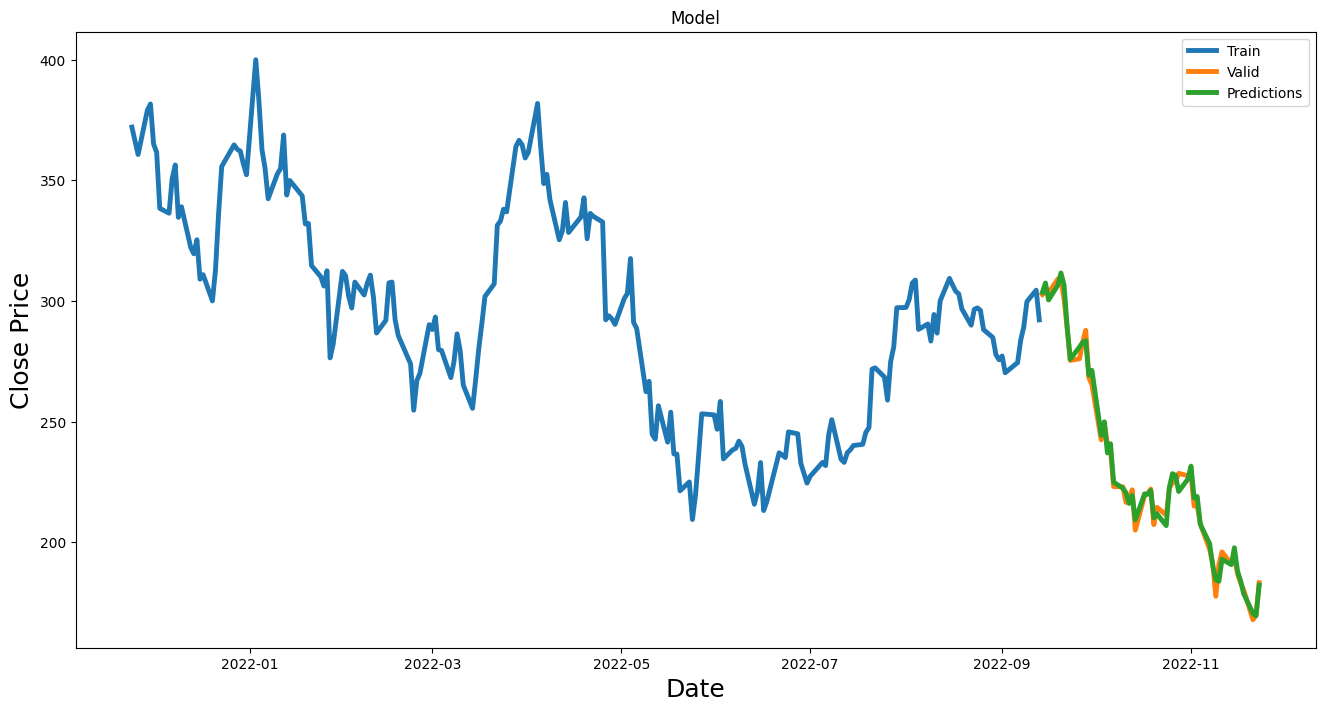

In [564]:
train = dataset[0:201]
valid = dataset[201:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Date'], train['Close'],linewidth=3.5)
plt.plot(valid['Date'], valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper right')

In [566]:
valid[['Date', 'Close', 'Predictions']]

,Date,Close,Predictions
201,2022-09-14,302.609985,303.523138
202,2022-09-15,303.750000,307.415773
203,2022-09-16,303.350006,300.369741
204,2022-09-19,309.070007,306.501430
205,2022-09-20,308.730011,311.558870
206,2022-09-21,300.799988,306.536850
207,2022-09-22,288.589996,289.264484
208,2022-09-23,275.329987,275.804665
209,2022-09-26,276.010010,280.936434
210,2022-09-27,282.940002,282.776811
